Задание 1.
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
x = pd.DataFrame(boston.data, columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y = pd.DataFrame(boston.target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)


In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)


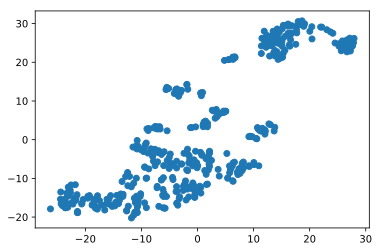

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2.
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [8]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = k_means.fit_predict(X_train_scaled)

In [9]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

In [10]:
labels_test = k_means.fit_predict(X_test_scaled) 

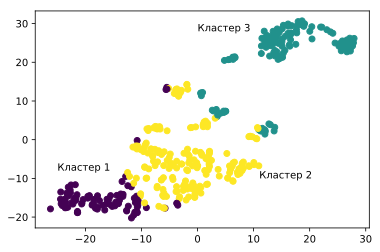

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-25, -8, 'Кластер 1')
plt.text(11, -10, 'Кластер 2')
plt.text(0, 28, 'Кластер 3')
plt.show()

In [12]:
y_train[labels_train == 0].mean()

price    27.788372
dtype: float64

In [13]:
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

In [14]:
y_train[labels_train == 2].mean()

price    24.958115
dtype: float64

In [15]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.07356558139534884

In [16]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.797028425196851

In [17]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.4216602094240837

Задание 3.
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [18]:
y_test, y_train

(     price
 173   23.6
 274   32.4
 491   13.6
 72    22.8
 452   16.1
 76    20.0
 316   17.8
 140   14.0
 471   19.6
 500   16.8
 218   21.5
 9     18.9
 414    7.0
 78    21.2
 323   18.5
 473   29.8
 124   18.8
 388   10.2
 195   50.0
 448   14.1
 271   25.2
 278   29.1
 30    12.7
 501   22.4
 421   14.2
 474   13.8
 79    20.3
 454   14.9
 210   21.7
 497   18.3
 ..     ...
 444   10.8
 355   20.6
 77    20.8
 398    5.0
 104   20.1
 203   48.5
 381   10.9
 489    7.0
 69    20.9
 408   17.2
 255   20.9
 392    9.7
 312   19.4
 234   29.0
 460   16.4
 324   25.0
 93    25.0
 137   17.1
 176   23.2
 417   10.4
 131   19.6
 346   17.2
 365   27.5
 132   23.0
 371   50.0
 412   17.9
 436    9.6
 411   17.2
 86    22.5
 75    21.4
 
 [102 rows x 1 columns],      price
 477   12.0
 15    19.9
 332   19.4
 423   13.4
 19    18.2
 325   24.6
 335   21.1
 56    24.7
 437    8.7
 409   27.5
 334   20.7
 181   36.2
 227   31.6
 434   11.7
 180   39.8
 25    13.9
 493   21.8
 238   23.7
 2